In [1]:
from __future__ import annotations

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
import sys

module_path = os.path.abspath(
    os.path.join("/Users/chatt07/Desktop/cqt_env/Quantum_Optimal_Control")
)
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append(
    os.path.abspath(
        os.path.join("/Users/chatt07/Desktop/cqt_env/Quantum_Optimal_Control")
    )
)

In [2]:
from template_configurations.qiskit.q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
)

/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Circuit context
global phase: π/2
                                           ┌───┐                         »
      q_1 -> 0 ────────────────────────────┤ X ├─────────────────────────»
               ┌─────────┐┌────┐┌─────────┐└─┬─┘                         »
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■────■──────────────■──»
               └─────────┘└────┘└─────────┘       │  ┌─┴─┐            │  »
      q_3 -> 2 ───────────────────────────────────┼──┤ X ├────────────┼──»
                                                ┌─┴─┐├───┤     ┌───┐┌─┴─┐»
      q_2 -> 3 ─────────────────────────────────┤ X ├┤ X ├──■──┤ X ├┤ X ├»
                                                └───┘└─┬─┘  │  └─┬─┘└───┘»
ancilla_0 -> 4 ────────────────────────────────────────┼────┼────┼───────»
                                                       │  ┌─┴─┐  │       »
      q_4 -> 5 ────────────────────────────────────────■──┤ X ├──■───────»
                                                          └───┘   

In [3]:
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

In [4]:
q_env = QuantumEnvironment(gate_q_env_config)
from qiskit.primitives import Estimator

# q_env = ContextAwareQuantumEnvironment(
#     gate_q_env_config, circuit_context, training_steps_per_gate=250
# )
# q_env.estimator = Estimator()
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)

In [5]:
from qiskit.quantum_info import Statevector, partial_trace
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)
print(Statevector.from_label("01"))
print(partial_trace(Statevector(qc), [2]))

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
              dims=(2, 2))


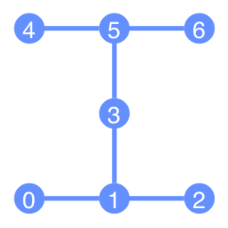

In [6]:
from qiskit.visualization import plot_gate_map

plot_gate_map(q_env.backend)

In [7]:
import yaml

with open(
        "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [8]:
from ppo import make_train_ppo

ppo_agent = make_train_ppo(agent_config, q_env)

In [9]:
ppo_agent(total_updates=500, print_debug=True, num_prints=40)

 96%|█████████▌| 480/500 [01:25<00:03,  5.67it/s]

Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 96%|█████████▌| 481/500 [01:25<00:03,  5.76it/s]

mean tensor([-0.0051,  0.5511, -1.0000,  0.5250,  0.5038, -0.5347,  0.4607])
sigma tensor([0.0192, 0.0227, 0.0478, 0.0203, 0.0144, 0.0130, 0.0128])
DFE Rewards Mean: 0.973631234831515
DFE Rewards standard dev 0.026493482222002106
Returns Mean: 4.858529
Returns standard dev 3.1099064
Advantages Mean: -2.0676365
Advantages standard dev 3.1099064
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IY', 'XI', 'XY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 96%|█████████▋| 482/500 [01:25<00:03,  5.78it/s]

mean tensor([ 0.0031,  0.5425, -1.0000,  0.5426,  0.4922, -0.5352,  0.4743])
sigma tensor([0.0309, 0.0189, 0.0238, 0.0195, 0.0187, 0.0156, 0.0151])
DFE Rewards Mean: 0.9919156201245531
DFE Rewards standard dev 0.012212046982900284
Returns Mean: 7.164135
Returns standard dev 4.1061254
Advantages Mean: 0.82275146
Advantages standard dev 4.1061254
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YZ', 'ZX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])


 97%|█████████▋| 483/500 [01:25<00:02,  5.81it/s]

mean tensor([ 0.0039,  0.5448, -1.0000,  0.5484,  0.4913, -0.5317,  0.4799])
sigma tensor([0.0316, 0.0163, 0.0189, 0.0192, 0.0188, 0.0147, 0.0165])
DFE Rewards Mean: 0.9800434023286466
DFE Rewards standard dev 0.019986044656612252
Returns Mean: 5.404104
Returns standard dev 3.5507565
Advantages Mean: -1.0464181
Advantages standard dev 3.5507567
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 97%|█████████▋| 484/500 [01:26<00:02,  5.83it/s]

mean tensor([-0.0058,  0.4916, -1.0000,  0.5023,  0.4998, -0.5196,  0.4708])
sigma tensor([0.0196, 0.0278, 0.0758, 0.0169, 0.0191, 0.0145, 0.0125])
DFE Rewards Mean: 0.9943490564956009
DFE Rewards standard dev 0.011030801877490838
Returns Mean: 7.6984634
Returns standard dev 4.142675
Advantages Mean: 0.63694286
Advantages standard dev 4.142675
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 485/500 [01:26<00:02,  5.81it/s]

mean tensor([-0.0068,  0.4502, -1.0000,  0.4672,  0.5163, -0.4953,  0.4567])
sigma tensor([0.0137, 0.0406, 0.2264, 0.0152, 0.0193, 0.0133, 0.0114])
DFE Rewards Mean: 0.996981199989083
DFE Rewards standard dev 0.00645365476632655
Returns Mean: 8.057406
Returns standard dev 3.8917494
Advantages Mean: 0.14899339
Advantages standard dev 3.8917494
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])


 97%|█████████▋| 486/500 [01:26<00:02,  4.72it/s]

mean tensor([-0.0115,  0.4795, -1.0000,  0.5075,  0.5058, -0.5107,  0.4773])
sigma tensor([0.0198, 0.0263, 0.0920, 0.0188, 0.0246, 0.0149, 0.0144])
DFE Rewards Mean: 0.9970452573046675
DFE Rewards standard dev 0.008605851105033886
Returns Mean: 8.538205
Returns standard dev 4.1998944
Advantages Mean: 1.0979728
Advantages standard dev 4.1998944
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 97%|█████████▋| 487/500 [01:26<00:02,  5.06it/s]

mean tensor([-0.0082,  0.4879, -1.0000,  0.5130,  0.5071, -0.5042,  0.4812])
sigma tensor([0.0200, 0.0283, 0.0812, 0.0188, 0.0233, 0.0146, 0.0139])
DFE Rewards Mean: 0.9966811612981019
DFE Rewards standard dev 0.007560653742701761
Returns Mean: 8.283459
Returns standard dev 4.066717
Advantages Mean: 0.7632947
Advantages standard dev 4.066717
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 98%|█████████▊| 488/500 [01:26<00:02,  5.27it/s]

mean tensor([ 0.0036,  0.5019, -1.0000,  0.5379,  0.5092, -0.5104,  0.4871])
sigma tensor([0.0230, 0.0253, 0.0424, 0.0180, 0.0246, 0.0135, 0.0128])
DFE Rewards Mean: 0.9902061690052627
DFE Rewards standard dev 0.014740946269372255
Returns Mean: 7.046054
Returns standard dev 4.2089787
Advantages Mean: -0.27412224
Advantages standard dev 4.2089787
Starting benchmarking...


 98%|█████████▊| 489/500 [01:27<00:02,  5.33it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([ 0.0048,  0.4754, -1.0000,  0.5390,  0.5050, -0.5111,  0.4726])
sigma tensor([0.0188, 0.0276, 0.0580, 0.0162, 0.0224, 0.0155, 0.0143])
DFE Rewards Mean: 0.9880740773420817
DFE Rewards standard dev 0.014692914228936146
Returns Mean: 6.4339437
Returns standard dev 3.9487216
Advantages Mean: -1.0111372
Advantages standard dev 3.9487216
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 98%|█████████▊| 490/500 [01:27<00:01,  5.39it/s]

mean tensor([ 0.0026,  0.4795, -1.0000,  0.5419,  0.4954, -0.5048,  0.4760])
sigma tensor([0.0194, 0.0250, 0.0477, 0.0170, 0.0222, 0.0152, 0.0126])
DFE Rewards Mean: 0.9916890295958986
DFE Rewards standard dev 0.013151199343219861
Returns Mean: 6.9676824
Returns standard dev 3.9563062
Advantages Mean: -0.13451166
Advantages standard dev 3.9563062
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 98%|█████████▊| 491/500 [01:27<00:01,  5.54it/s]

mean tensor([-0.0187,  0.4237, -1.0000,  0.5002,  0.5158, -0.4996,  0.4687])
sigma tensor([0.0106, 0.0412, 0.1875, 0.0179, 0.0200, 0.0150, 0.0106])
DFE Rewards Mean: 0.9932719489548024
DFE Rewards standard dev 0.010638777116661387
Returns Mean: 7.329673
Returns standard dev 4.125359
Advantages Mean: -0.5987049
Advantages standard dev 4.125359
Starting benchmarking...


 98%|█████████▊| 492/500 [01:27<00:01,  5.59it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([-0.0156,  0.4321, -1.0000,  0.5090,  0.5053, -0.4995,  0.4709])
sigma tensor([0.0117, 0.0384, 0.1507, 0.0170, 0.0214, 0.0152, 0.0101])
DFE Rewards Mean: 0.9946388233490344
DFE Rewards standard dev 0.011368703908668107
Returns Mean: 7.9029922
Returns standard dev 4.2686033
Advantages Mean: 0.36823928
Advantages standard dev 4.2686033
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 99%|█████████▊| 493/500 [01:27<00:01,  5.64it/s]

mean tensor([-0.0130,  0.4400, -1.0000,  0.5112,  0.5064, -0.5047,  0.4732])
sigma tensor([0.0135, 0.0336, 0.1337, 0.0171, 0.0218, 0.0141, 0.0102])
DFE Rewards Mean: 0.9962640772937821
DFE Rewards standard dev 0.008453152184165003
Returns Mean: 8.346849
Returns standard dev 4.223663
Advantages Mean: 0.75933415
Advantages standard dev 4.223663
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([-0.0159,  0.4294, -1.0000,  0.5123,  0.5123, -0.4987,  0.4766])
sigma tensor([0.0123, 0.0377, 0.1550, 0.0161, 0.0205, 0.0148, 0.0098])
DFE Rewards Mean: 0.9966356107409347


 99%|█████████▉| 494/500 [01:27<00:01,  5.82it/s]

DFE Rewards standard dev 0.008461850440525902
Returns Mean: 8.484068
Returns standard dev 4.189054
Advantages Mean: 0.71943647
Advantages standard dev 4.189054
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 99%|█████████▉| 495/500 [01:28<00:00,  5.84it/s]

mean tensor([-0.0173,  0.4327, -1.0000,  0.5140,  0.5141, -0.5000,  0.4757])
sigma tensor([0.0135, 0.0379, 0.1557, 0.0134, 0.0207, 0.0171, 0.0107])
DFE Rewards Mean: 0.9960185791220671
DFE Rewards standard dev 0.009175064375934447
Returns Mean: 8.221864
Returns standard dev 4.21182
Advantages Mean: 0.2670946
Advantages standard dev 4.21182
Starting benchmarking...


 99%|█████████▉| 496/500 [01:28<00:00,  5.75it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])
mean tensor([-0.0144,  0.4012, -1.0000,  0.5046,  0.5156, -0.5005,  0.4792])
sigma tensor([0.0108, 0.0427, 0.2531, 0.0117, 0.0193, 0.0175, 0.0092])
DFE Rewards Mean: 0.9950747214438653
DFE Rewards standard dev 0.009561610013515125
Returns Mean: 7.9089947
Returns standard dev 4.211484
Advantages Mean: -0.47155887
Advantages standard dev 4.211484
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])


 99%|█████████▉| 497/500 [01:28<00:00,  5.78it/s]

mean tensor([ 0.0021,  0.4612, -1.0000,  0.5516,  0.5090, -0.5074,  0.4880])
sigma tensor([0.0189, 0.0271, 0.0755, 0.0128, 0.0181, 0.0167, 0.0099])
DFE Rewards Mean: 0.9805042210463355
DFE Rewards standard dev 0.018917914430232597
Returns Mean: 5.3576837
Returns standard dev 3.3828144
Advantages Mean: -2.034657
Advantages standard dev 3.3828144
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


100%|█████████▉| 498/500 [01:28<00:00,  5.90it/s]

mean tensor([ 0.0077,  0.4768, -1.0000,  0.5643,  0.5025, -0.5091,  0.4919])
sigma tensor([0.0214, 0.0219, 0.0406, 0.0127, 0.0172, 0.0179, 0.0095])
DFE Rewards Mean: 0.9854912087339549
DFE Rewards standard dev 0.014455289391564076
Returns Mean: 5.8163767
Returns standard dev 3.6190045
Advantages Mean: -1.0408183
Advantages standard dev 3.6190042
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])


100%|█████████▉| 499/500 [01:28<00:00,  4.89it/s]

mean tensor([-0.0047,  0.4567, -1.0000,  0.5418,  0.5052, -0.4979,  0.4850])
sigma tensor([0.0164, 0.0266, 0.0902, 0.0145, 0.0190, 0.0174, 0.0094])
DFE Rewards Mean: 0.984462808027081
DFE Rewards standard dev 0.019375341894954518
Returns Mean: 5.6188374
Returns standard dev 3.3228602
Advantages Mean: -1.5176741
Advantages standard dev 3.3228602
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YZ', 'ZX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])


100%|██████████| 500/500 [01:29<00:00,  5.62it/s]

mean tensor([ 0.0133,  0.4921, -1.0000,  0.5650,  0.5001, -0.4974,  0.4842])
sigma tensor([0.0258, 0.0182, 0.0278, 0.0196, 0.0230, 0.0197, 0.0122])
DFE Rewards Mean: 0.9871996898537145
DFE Rewards standard dev 0.017448626626071533
Returns Mean: 6.600585
Returns standard dev 4.187696
Advantages Mean: 0.5393844
Advantages standard dev 4.187696


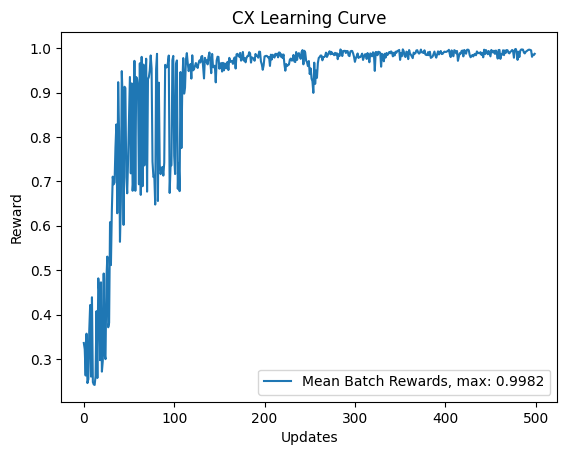

In [10]:
import numpy as np
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title("CX Learning Curve")
plt.legend()
plt.show()

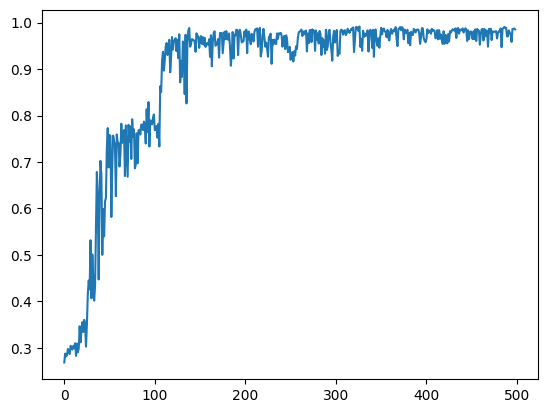

In [12]:
plt.plot(q_env.avg_fidelity_history)

In [11]:
q_env.reward_history[-1]

array([ 1.29259848e-01,  9.95042579e-02,  1.64459705e-01,  1.19317828e-01,
        3.51218039e-02,  2.44988900e-05,  2.44982333e-01,  6.56575662e-03,
       -5.87239351e-05,  1.90003646e-01,  2.25064383e-01,  2.19731492e-01,
        3.50681135e-02,  1.55364750e-01,  1.78388921e-01,  2.07233380e-02,
        5.56078711e-04,  5.70909649e-02, -3.27391708e-05,  8.76430542e-02,
        2.12912664e-01,  1.16852769e-01,  2.14132213e-01,  6.82688321e-05,
        9.23182098e-02,  1.68608686e-01,  1.20757522e-01,  1.75056506e-01,
        2.00416961e-03, -1.17405389e-04,  1.08797387e-01,  1.29904657e-01,
        1.46819011e-01,  2.02946072e-01,  1.80128271e-01, -4.47661959e-05,
        2.00780267e-01,  3.12427314e-05,  1.21019864e-01, -4.34675824e-05,
        1.02342358e-01,  1.69948818e-01,  2.02475482e-01,  2.25016107e-01,
        1.13502184e-03,  2.19544712e-01,  1.05527098e-02,  1.53058630e-01,
        1.25493430e-04,  7.72849895e-05, -6.90755732e-05,  1.80208578e-01,
        1.98162937e-01,  